# AOLS Overview

Example created by Wilson Rocha Lacerda Junior

> **Looking for more details on NARMAX models?**
> For comprehensive information on models, methods, and a wide range of examples and benchmarks implemented in SysIdentPy, check out our book:
> [*Nonlinear System Identification and Forecasting: Theory and Practice With SysIdentPy*](https://sysidentpy.org/book/0%20-%20Preface/)
>
> This book provides in-depth guidance to support your work with SysIdentPy.

In [1]:
import pandas as pd
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.basis_function import Polynomial
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import (
    compute_residues_autocorrelation,
    compute_cross_correlation,
)
from sysidentpy.model_structure_selection import AOLS

# generating simulated data
x_train, x_test, y_train, y_test = get_siso_data(
    n=1000, colored_noise=False, sigma=0.001, train_percentage=90
)

In [2]:
basis_function = Polynomial(degree=2)
model = AOLS(xlag=3, ylag=3, k=5, L=1, basis_function=basis_function)

model.fit(X=x_train, y=y_train)

In [3]:
yhat = model.predict(X=x_test, y=y_test)
rrse = root_relative_squared_error(y_test, yhat)
print(rrse)
r = pd.DataFrame(
    results(
        model.final_model,
        model.theta,
        model.err,
        model.n_terms,
        err_precision=8,
        dtype="sci",
    ),
    columns=["Regressors", "Parameters", "ERR"],
)
print(r)

0.0018996279285613828
      Regressors   Parameters             ERR
0         y(k-1)   1.9999E-01  0.00000000E+00
1        x1(k-2)   9.0003E-01  0.00000000E+00
2  x1(k-1)y(k-1)   9.9954E-02  0.00000000E+00
3  x1(k-3)y(k-1)  -2.1442E-04  0.00000000E+00
4      x1(k-1)^2   3.3714E-04  0.00000000E+00


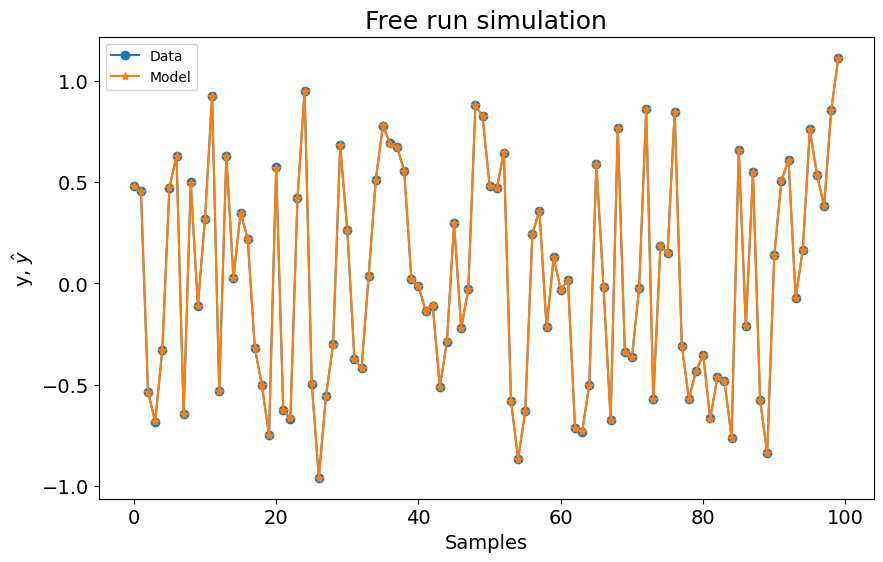

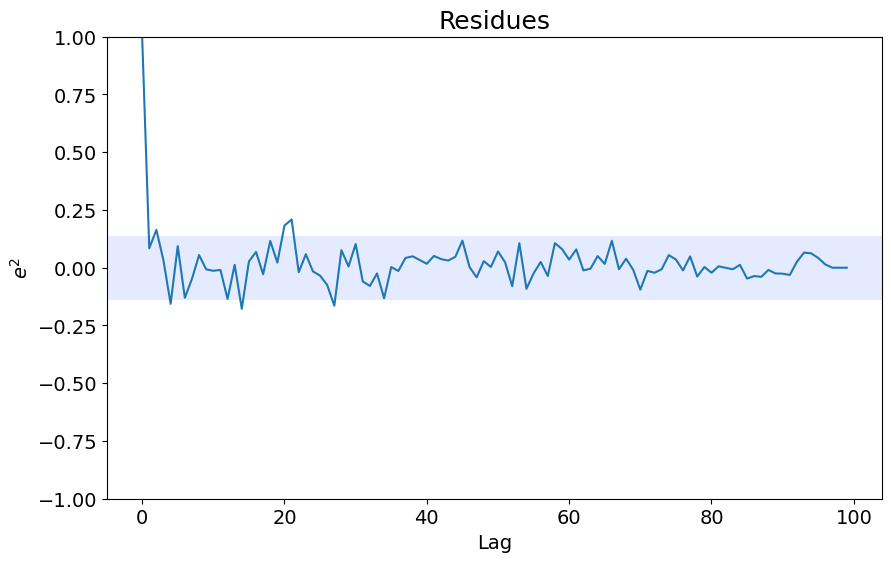

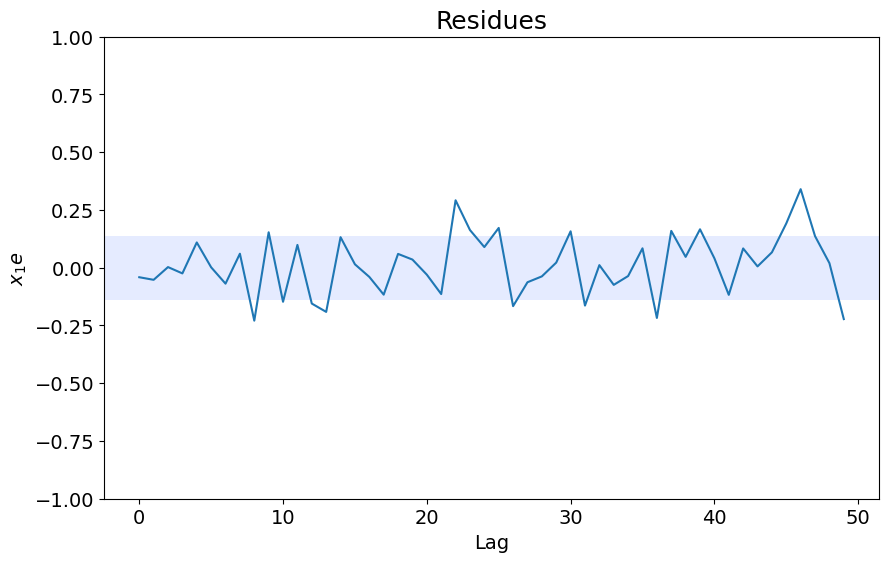

In [4]:
plot_results(y=y_test, yhat=yhat, n=1000)
ee = compute_residues_autocorrelation(y_test, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_test, yhat, x_test)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")